# PCA
exercise inspired by

https://www.askpython.com/python/examples/principal-component-analysis#:~:text=Principal%20Component%20Analysis%20from%20Scratch%20in%20Python%20Principal,and%20statistics.%20PCA%20is%20an%20unsupervised%20statistical%20method.

 

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# load data

In [152]:
#Load Dataset
# The data set can be download from https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29.

frogs: pd.DataFrame = pd.read_csv("Frogs_MFCCs.csv")
obs = frogs.shape[0]
dims = frogs.shape[1]-4
print(f'shape: {obs} observations, {dims} features')
print(f'columns: {frogs.columns.values}') 
print(f'Species: \n{frogs["Family"].value_counts()}')

shape: 7195 observations, 22 features
columns: ['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22' 'Family' 'Genus' 'Species'
 'RecordID']
Species: 
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64


In [153]:
labels = ['Family' ,'Genus' ,'Species']
features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']

df_labels     : pd.DataFrame = frogs[labels]
df            : pd.DataFrame = frogs[features]


# feature matrix
as a numpy array

<function matplotlib.pyplot.show(close=None, block=None)>

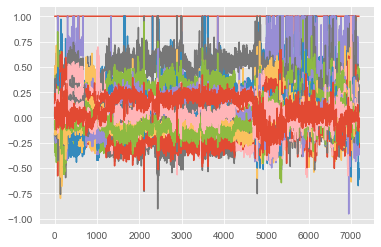

In [154]:
X: np.ndarray= df.values
X.shape
plt.plot(X)
plt.show


# normalize data

<function matplotlib.pyplot.show(close=None, block=None)>

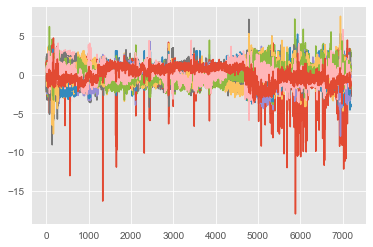

In [155]:
from sklearn.preprocessing import StandardScaler
mm = np.mean(X, axis = 0)
sd = np.std (X, axis = 0)

X_scaled = (X  - mm)/sd  
plt.plot(X_scaled)
plt.show

# PCA using only numpy

<AxesSubplot:>

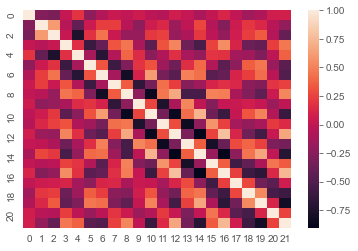

In [156]:
## covariance matrix
cov_mat = np.cov(X_scaled, rowvar = False)
sns.heatmap(cov_mat)

In [172]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

eigen = pd.DataFrame(columns = ['val', 'vect'])
eigen.val = eigen_values

for i,row in eigen.iterrows():
    eigen.at[i, 'vect'] = eigen_vectors[i,:22]
    
eigen = eigen.sort_values(by='val', ascending = False)
eigen['explained_variance'] = eigen['val'].cumsum()/eigen['val'].sum()
eigen['pc'] = 'PC'+(22-eigen.index).astype(str)
eigen.reset_index(drop = True, inplace = True)
eigen.val


0     7.658106
1     3.300086
2     2.497924
3     1.726090
4     1.517316
5     1.002908
6     0.850612
7     0.807395
8     0.672769
9     0.393608
10    0.322668
11    0.283302
12    0.228921
13    0.207744
14    0.144420
15    0.132152
16    0.105715
17    0.060212
18    0.041798
19    0.025406
20    0.015459
21    0.008446
Name: val, dtype: float64

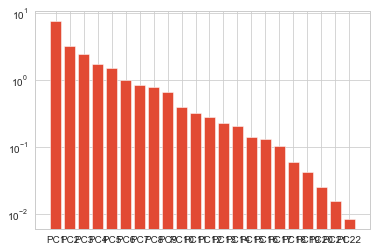

In [178]:
#eigenvalue spectrum log scale

plt.bar(eigen.pc, eigen.val)
plt.yscale("log")


Text(0, 0.5, 'Explained variance')

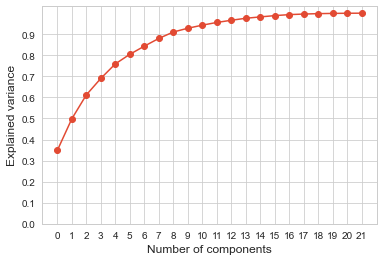

In [173]:
plt.plot(eigen.explained_variance, marker = 'o')
plt.xticks( range(0,22,1) )
plt.yticks( np.arange(0,1,.1) )
plt.xlabel('Number of components')
plt.ylabel('Explained variance')


# reduce dimension

In [159]:
# reduce dimension
limit = .90
index_to_drop = eigen[ eigen.explained_variance > limit ].index[1:]
eigen_r = eigen.drop(index = index_to_drop)
eigen_r

,values,vectors,explained_variance,pc


# transform


In [160]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_sub = sorted_eigenvectors[:,0:3]
a = eigenvector_sub.transpose()
b = X_scaled.transpose()
X_pc = np.dot(a,b).transpose()
X_pc

array([[ 3.71295621,  1.22647775, -3.06413955],
       [ 3.72455021,  1.54576161, -3.24405089],
       [ 3.14074871,  1.74016711, -3.0952695 ],
       ...,
       [ 2.67166273,  1.99955905, -2.5874329 ],
       [ 3.00425857,  1.99712537, -2.51973871],
       [ 2.85784871,  1.97061878, -2.49943862]])

In [161]:
X_pc_df = pd.DataFrame(X_pc)
X_pc_df = pd.concat((X_pc_df, df_labels), 1)
# cc = [0,1, 'Family']
# X_pca_df = X_pca_df[cc]

# X_pca_df.columns = ['pc1', 'pc2', 'Family']

X_pc_df

,0,1,2,Family,Genus,Species
0,3.712956,1.226478,-3.064140,Leptodactylidae,Adenomera,AdenomeraAndre
1,3.724550,1.545762,-3.244051,Leptodactylidae,Adenomera,AdenomeraAndre
2,3.140749,1.740167,-3.095270,Leptodactylidae,Adenomera,AdenomeraAndre
3,3.532968,1.760899,-3.468054,Leptodactylidae,Adenomera,AdenomeraAndre
4,3.280591,1.986265,-3.691547,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...
7190,3.074746,1.987734,-2.529745,Hylidae,Scinax,ScinaxRuber
7191,2.919222,1.914616,-2.676608,Hylidae,Scinax,ScinaxRuber
7192,2.671663,1.999559,-2.587433,Hylidae,Scinax,ScinaxRuber
7193,3.004259,1.997125,-2.519739,Hylidae,Scinax,ScinaxRuber


<function matplotlib.pyplot.show(close=None, block=None)>

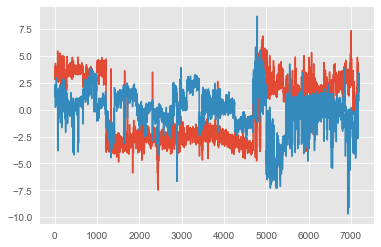

In [162]:
n_components_to_plot = 2
plt.plot(X_pc[:,:n_components_to_plot])
plt.show

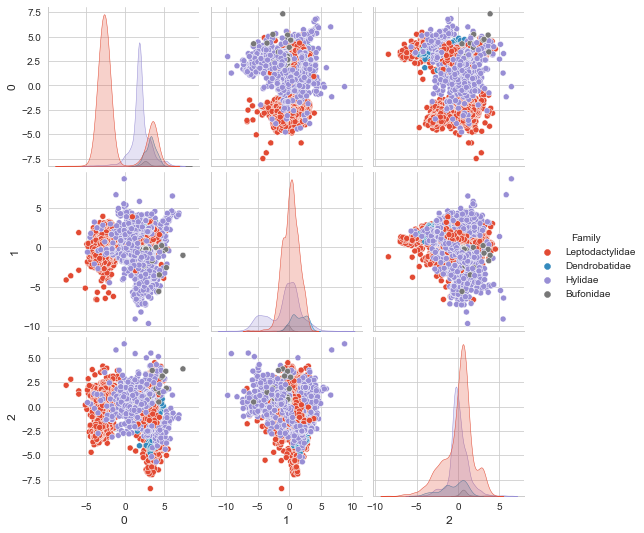

In [163]:
sns.set_style("whitegrid")
sns.pairplot(X_pc_df,hue = 'Family')
plt.show()